## **K-Means++ Clustering**

## Introduction to K-Means++

The K-Means clustering algorithm is more than half a century old, but it is not falling out of fashion; it is still the most popular clustering algorithm for Machine Learning.

However, there can be some problems with its first step. In the traditional K-Means algorithms, the starting postitions of the centroids are intialised completely randomly. This can result in suboptimal clusters.

The **K-Means++ algorithm** is a variation on K-Means that changes the way centroids are initalised to try to fix this problem.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

import random
import timeit

The inertia of model that randomly initialised centroids is 171.81270859126667
The inertia of model that initialised the centroids using KMeans++ is 171.8121038792753


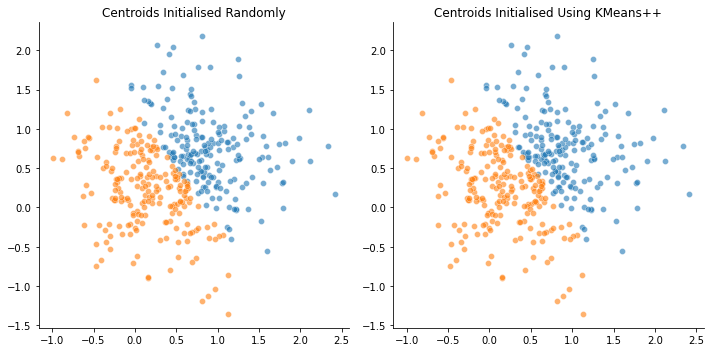

In [11]:
mu = 1
std = 0.5

np.random.seed(100)
xs = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.75,std,100)), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100))
ys = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100)), np.random.normal(0.75,std,100))

values = list(zip(xs, ys))

model = KMeans(init='random', n_clusters=2)
results = model.fit_predict(values)
print("The inertia of model that randomly initialised centroids is " + str(model.inertia_))

fig, axs = plt.subplots(1, 2, figsize=(10,5))
for i in range(2):
    points = np.array([values[j] for j in range(len(values)) if results[j] == i])
    sns.scatterplot(x=points[:, 0], y=points[:, 1], alpha=0.6, ax=axs[0])
axs[0].set_title('Centroids Initialised Randomly')

model = KMeans(n_clusters=2)
results = model.fit_predict(values)
print("The inertia of model that initialised the centroids using KMeans++ is " + str(model.inertia_))

for i in range(2):
    points = np.array([values[j] for j in range(len(values)) if results[j] == i])
    sns.scatterplot(x=points[:, 0], y=points[:, 1], alpha=0.6, ax=axs[1])

axs[1].set_title('Centroids Initialised Using KMeans++')
plt.tight_layout()
sns.despine()

It’s hard to see, but the clusters are different. Look at the point at x=0.2 and y=1. On the left graph you should see a purple point, but on the right graph a yellow point.

Which one of these clusters is better? The model with the lower inertia has more coherent clusters.

## Poor Clustering

Suppose we have four data samples that form a rectangle whose width is greater than its height:

<img src="datapoints_a.png" alt="image_1" width="30%" height="30%">

If you wanted to find two clusters (`k` = 2) in the data, which points would you cluster together? You might guess the points that align vertically cluster together, since the height of the rectangle is smaller than its width. We end up with a left cluster (purple points) and a right cluster (yellow points).

<img src="datapoints_b.png" alt="image_1" width="30%" height="30%">

Let’s say we use the regular K-Means algorithm to cluster the points, where the cluster centroids are initialized randomly. We get unlucky and those randomly initialized cluster centroids happen to be the midpoints of the top and bottom line segments of the rectangle formed by the four data points.

<img src="datapoints_c.png" alt="image_1" width="25%" height="25%">

The algorithm would converge immediately, without moving the cluster centroids. Consequently, the two top data points are clustered together (yellow points) and the two bottom data points are clustered together (purple points).

<img src="datapoints_d.png" alt="image_1" width="25%" height="25%">

This is a *suboptimal clustering* because the width of the rectangle is greater than its height. The optimal clusters would be the two left points as one cluster and the two right points as one cluster, as we thought earlier.

## What is K-Means++?

To recap, the Step 1 of the K-Means algorithm is “Place `k` random centroids for the initial clusters”.

The K-Means++ algorithm replaces Step 1 of the K-Means algorithm and adds the following:
- **1.1** The first cluster centroid is randomly picked from the data points.
- **1.2** For each remaining data point, the distance from the point to its nearest cluster centroid is calculated.
- **1.3** The next cluster centroid is picked according to a probability proportional to the distance of each point to its nearest cluster centroid. This makes it likely for the next cluster centroid to be far away from the already initialised centroids.

**Repeat 1.2 - 1.3** until `k` centroids are chosen.

The image below shows the initialisation of centroids by regular K-Means (randomly) and K-Means++. Notice how the centroids created by the latter are more spaced out.

<img src="random_vs_kmeans++.png" alt="image_1" width="60%" height="60%">

## K-Means++ using Scikit-Learn

Using the scikit-learn library and its `cluster` module, you can use the `KMeans()` method to build an original K-Means model that finds 6 clusters like so:

`model = KMeans(n_clusters=6, init='random')`

The init parameter is used to specify the initialisation and `init='random'` specifies that initial centroids are chosen as random (the original K-Means).

But how do you implement K-Means++?

There are two ways and they both require little change to the syntax:

**Option 1:** You can adjust the parameter to `init='k-means++'`.

`test = KMeans(n_clusters=6, init='k-means++')`

**Option 2:** Simply drop the parameter.

`test = KMeans(n_clusters=6)`

This is because that `init=k-means++` is actually default in scikit-learn.

## Review

K-Means++ improves K-Means by placing initial centroids more strategically. As a result, it can result in more optimal clusterings than K-Means.

It can also outperform K-Means in speed. If you get very unlucky initial centroids using K-Means, the algorithm can take a long time to converge. K-Means++ will often converge quicker!

You can implement K-Means++ with the scikit-learn library similar to how you implement K-Means.

The `KMeans()` function has an init parameter, which specifies the method for initialisation:
- `'random'`
- `'k-means++'`